In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/car_purchasing.csv",encoding="ISO-8859-1")

In [ ]:
df.head(5)

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [ ]:
df.drop(columns=['customer name','customer e-mail','country','gender'],inplace=True)

In [ ]:
df.head(3)

,age,annual Salary,credit card debt,net worth,car purchase amount
0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,43.152897,53798.55112,11160.355060,638467.1773,42925.70921


In [ ]:
df.isnull().sum()

age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

In [ ]:
num_cols=['age','annual Salary','credit card debt','net worth']

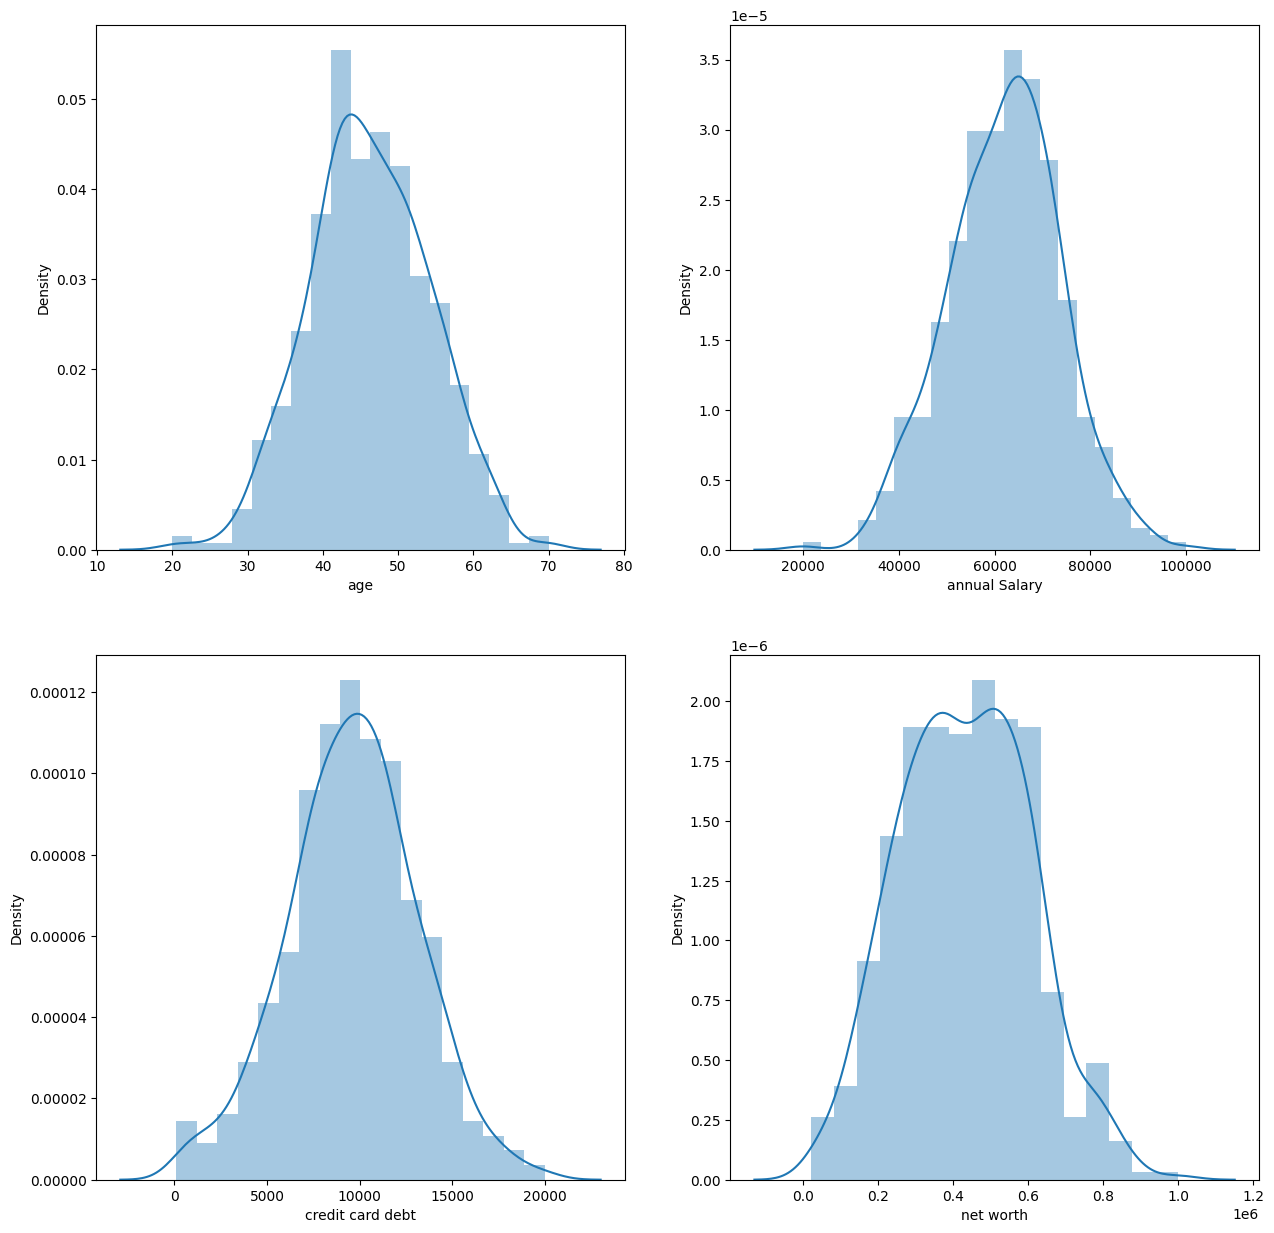

In [ ]:
plt.figure(figsize=(15,15))
for i in enumerate(num_cols):
    plt.subplot(2,2,i[0]+1)
    sns.distplot(df[i[1]])

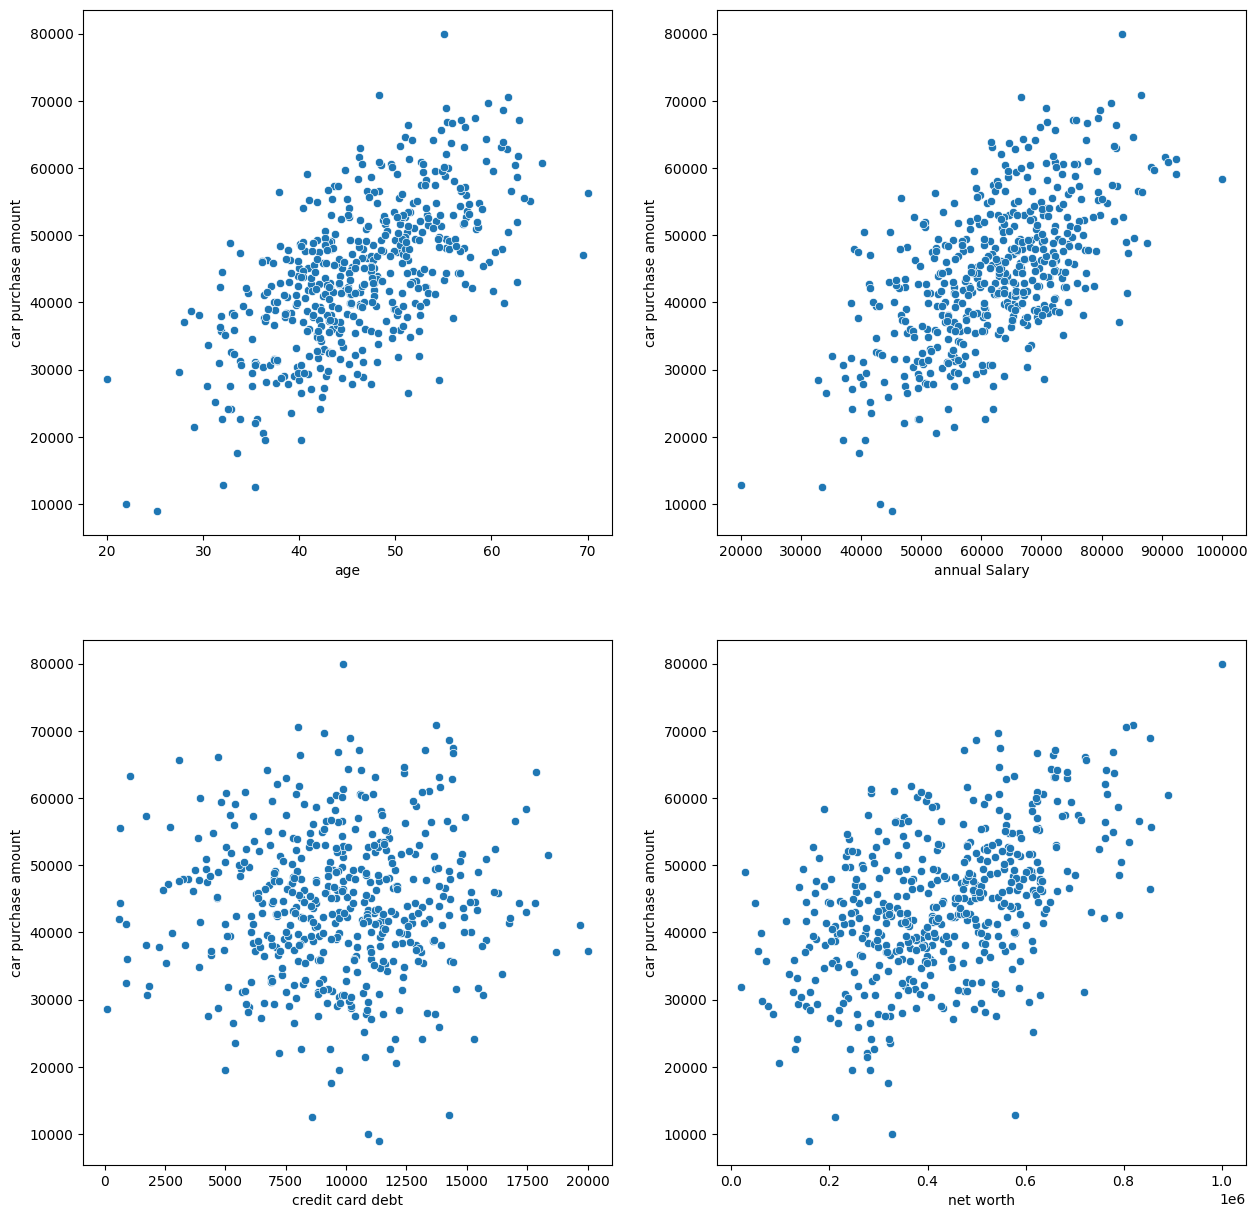

In [ ]:
plt.figure(figsize=(15,15))
for i in enumerate(num_cols):
    plt.subplot(2,2,i[0]+1)
    sns.scatterplot(x=df[i[1]],y=df['car purchase amount'])

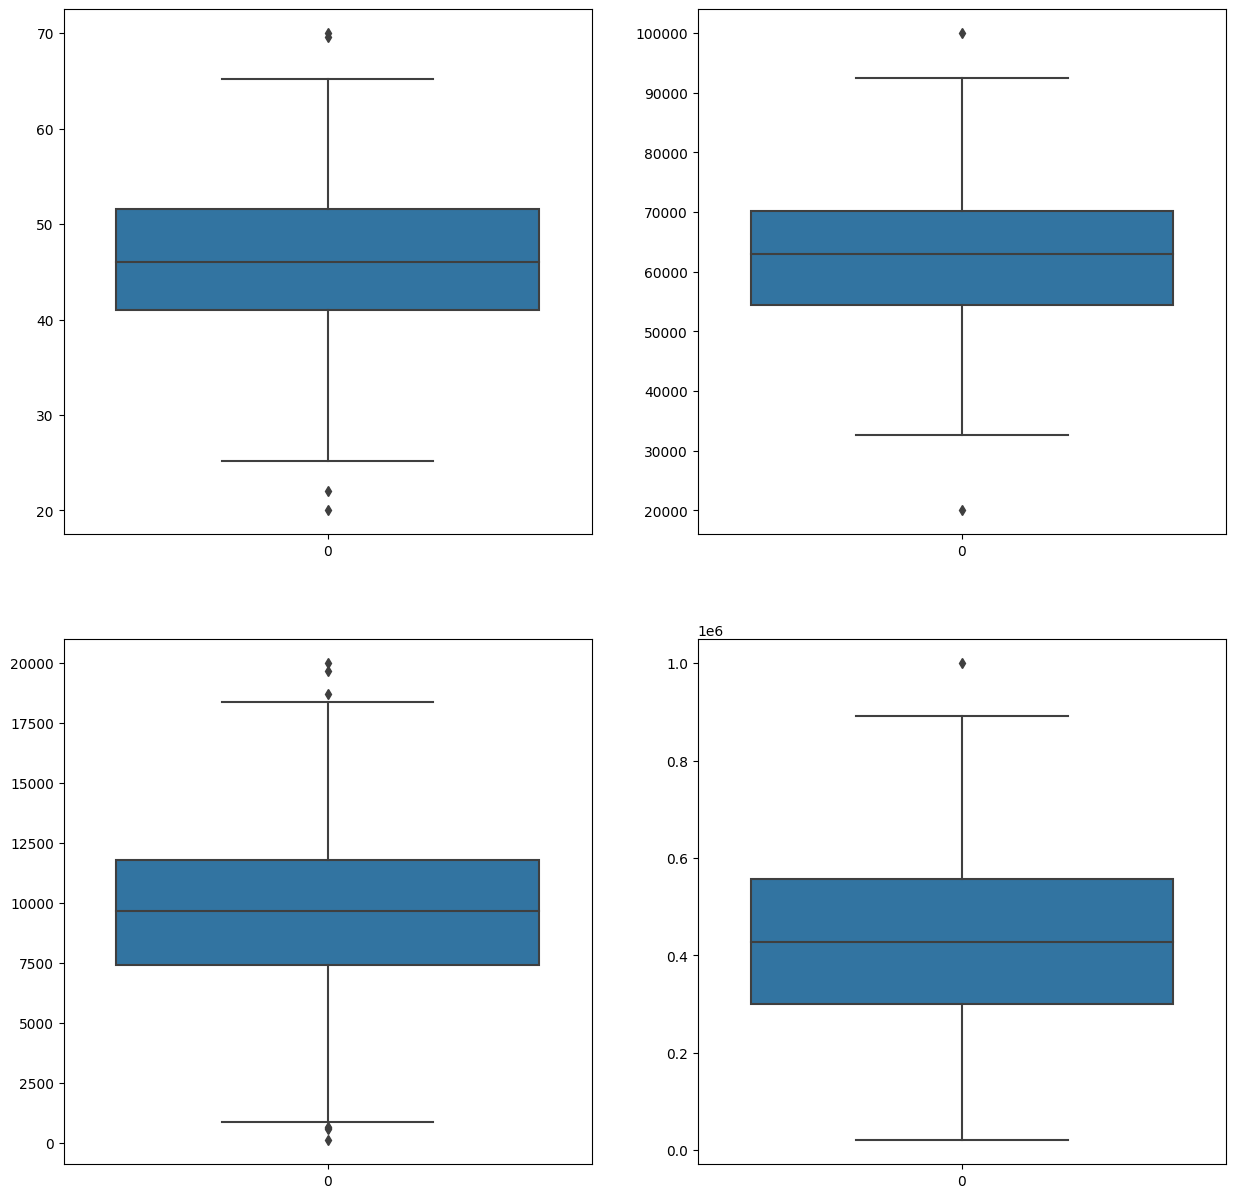

In [ ]:
plt.figure(figsize=(15,15))
for i in enumerate(num_cols):
    plt.subplot(2,2,i[0]+1)
    sns.boxplot(df[i[1]])

In [ ]:
def remove_outlier(df,col_name):
    Q1=df[col_name].quantile(0.25)
    Q3=df[col_name].quantile(0.75)
    IQR=Q3-Q1
    df_out=df.loc[(df[col_name]>Q1-1.5*IQR)&(df[col_name]<Q3+1.5*IQR)]
    return df_out
df=remove_outlier(df,'age')
df=remove_outlier(df,'credit card debt')
df=remove_outlier(df,'net worth')
df=remove_outlier(df,'annual Salary')

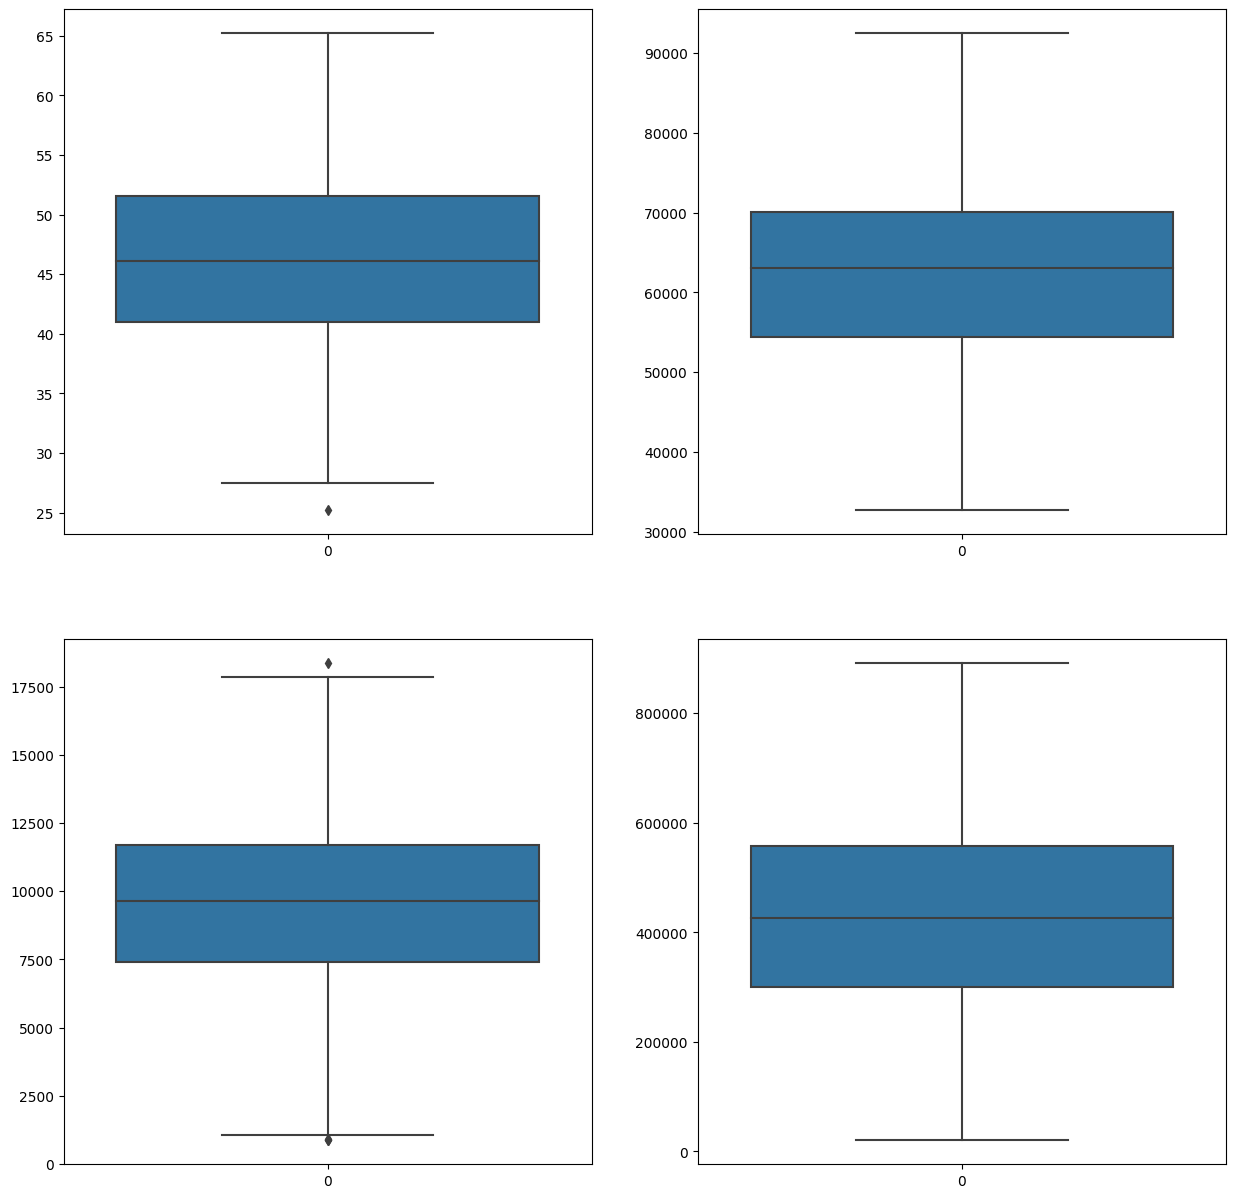

In [ ]:
plt.figure(figsize=(15,15))
for i in enumerate(num_cols):
    plt.subplot(2,2,i[0]+1)
    sns.boxplot(df[i[1]])

In [ ]:
x=df.drop(columns='car purchase amount')
y=df['car purchase amount']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=scaler.fit_transform(x)
y=scaler.fit_transform(y.values.reshape(-1,1))

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(389, 4)
(389, 1)
(98, 4)
(98, 1)


In [ ]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model=Sequential()
model.add(Dense(10,activation='relu',input_dim=4))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='linear'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                50        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 171
Trainable params: 171
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')#,metrics=['mean_absolute_error'])

In [ ]:
history=model.fit(x_train,y_train,epochs=50,validation_split=0.2)

Epoch 1/50
10/10 [==============================] - 1s 21ms/step - loss: 0.2159 - val_loss: 0.1913
Epoch 2/50
10/10 [==============================] - 0s 6ms/step - loss: 0.1638 - val_loss: 0.1400
Epoch 3/50
10/10 [==============================] - 0s 5ms/step - loss: 0.1156 - val_loss: 0.0946
Epoch 4/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0750 - val_loss: 0.0574
Epoch 5/50
10/10 [==============================] - 0s 5ms/step - loss: 0.0423 - val_loss: 0.0320
Epoch 6/50
10/10 [==============================] - 0s 6ms/step - loss: 0.0232 - val_loss: 0.0185
Epoch 7/50
10/10 [==============================] - 0s 5ms/step - loss: 0.0148 - val_loss: 0.0146
Epoch 8/50
10/10 [==============================] - 0s 8ms/step - loss: 0.0135 - val_loss: 0.0143
Epoch 9/50
10/10 [==============================] - 0s 5ms/step - loss: 0.0133 - val_loss: 0.0139
Epoch 10/50
10/10 [==============================] - 0s 5ms/step - loss: 0.0129 - val_loss: 0.0135
Epoch 11/50
10/10 

In [ ]:
y_pred=model.predict(x_test)

4/4 [==============================] - 0s 2ms/step


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.99039546320371

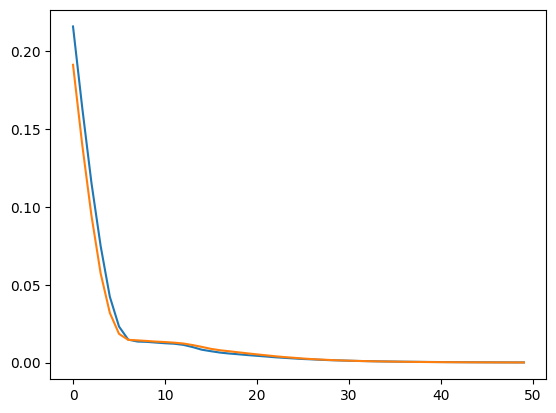

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])